# Problem Statement:

### Given Clinical Paramater about a Patient, Can we predict whether or not they have Heart Diseases or not?




# Import Tools Needed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Model Import

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Load the Data

In [ ]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA (Exploratory Data Analysis)

The goal of EDA is the find out more about the data and become a subject matter expert.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat them eg: Catogorical data, Numerical Data
3. What's missing from the data and how should we deal with them.
4. Where are Outliers and Why should we remove them.
5. How can you Add,Change,Remove features to get more from your data?

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

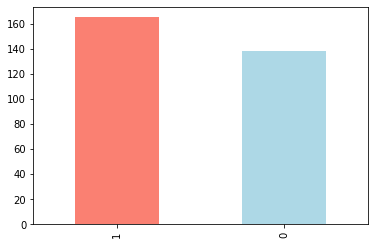

In [ ]:
data['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
len(data['sex'])

303

In [ ]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

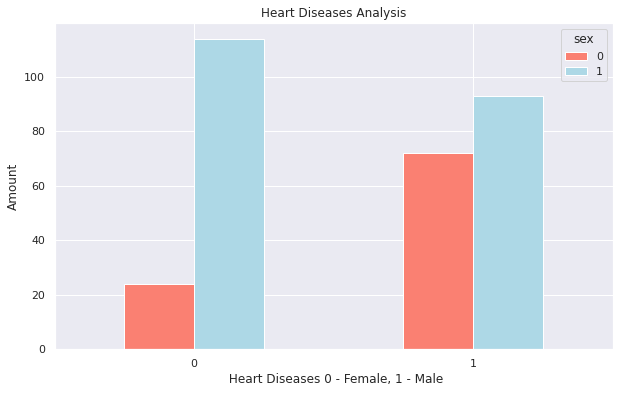

In [ ]:
pd.crosstab(data.target,data.sex).plot(kind='bar',
                                       figsize=(10,6),
                                       color=['salmon','lightblue'])
plt.title('Heart Diseases Analysis')
plt.xlabel(' Heart Diseases 0 - Female, 1 - Male')
plt.ylabel('Amount')
# xticks() used to rotate X label number 0 and 1
plt.xticks(rotation=0)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Age Vs Max Heart Rate 

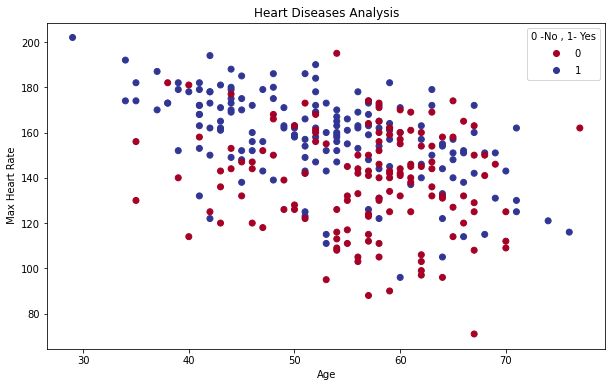

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))


scatter = ax.scatter(data["age"], 
                      data["thalach"],
                    c =  data['target'],
                     cmap='RdYlBu')

ax.set(title="Heart Diseases Analysis",xlabel='Age',
        ylabel=" Max Heart Rate")

ax.legend(*scatter.legend_elements(),title='0 -No , 1- Yes')

plt.show()

# Check The Distribution for the Spread of  the data


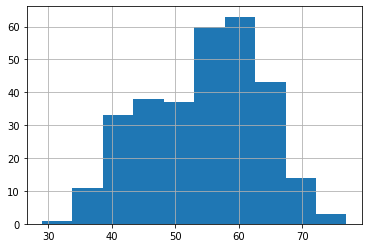

In [ ]:
# both code works
#data.age.hist()
data['age'].hist()

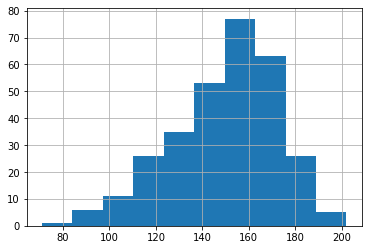

In [ ]:
data['thalach'].hist()

In [ ]:
# To check distribution in one go 
#kind='kde' is used to plot density curve instead of histogram
#sns.pairplot(data,kind='kde')

# Frequency for Cp type 

0 - Typical angina:  Chest pain related to decrease in blood supply to the heart

1 - Atypical angina: Chest pain not related to heart

2 - Non anginal Pain: Typical esophageal Spasms(non heart related)

3 - Asymptomatic: Chest Pain not showing sign of diseases 


In [ ]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


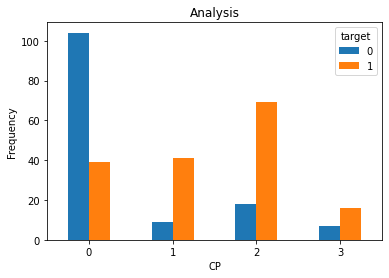

In [ ]:
pd.crosstab(data.cp,data.target).plot(kind='bar')
plt.title('Analysis')
plt.xlabel('CP')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Correlation Matrix

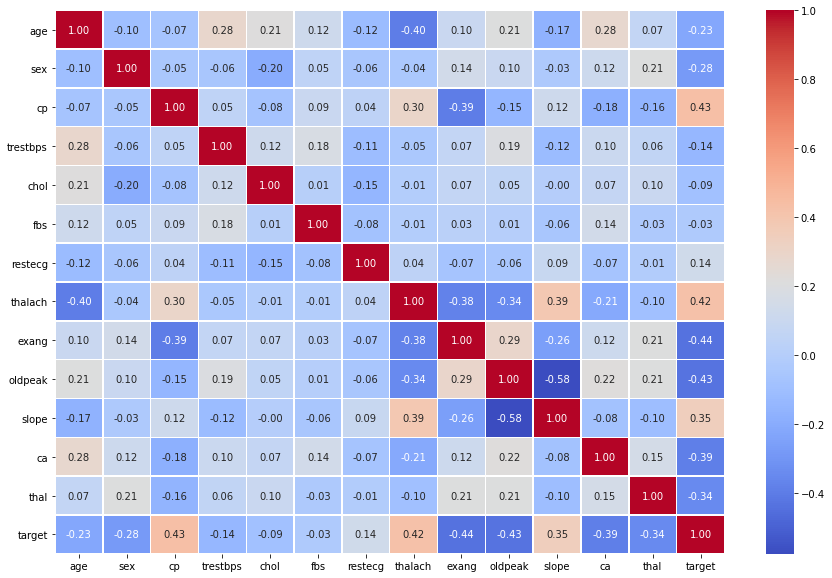

In [ ]:
corr_mat = data.corr()
fig , ax=plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_mat,annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='coolwarm')

# Modeling

In [ ]:
X = data.drop('target',axis=1)

y = data['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
np.random.seed(42)

# split into train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train)

242

In [ ]:
len(y_train)

242

# Building A Machine Learning Classification Model



1.   Logistic Regression
2.   KNearest Neighbours
3.   Random Forest Classifier



In [ ]:
# Efficient Method
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

Alternate method is doing it line by line

Lr = LogisticRegression()

lr.fit(X_train,y_train)


# Model Comparison

## Base Line Model


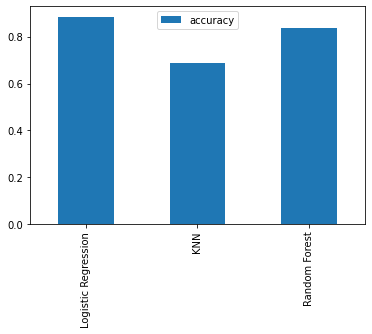

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.show()

# Things we are going to do Perform below:



*   Hyperparameter Tuning
*   Feature Importance
*   Confusion Matrix
*   Cross-Validation
*   Precision
*   Recall
*   F1 Score
*   Classification Report
*   Roc-Curve
*   Area under the Curve(AUC)








### KNN Classifier Training

Hyperparameter tuning by Hand

In [ ]:
train_scores = []
test_scores = []


#Create a list of different for n_neighbors
neighbors = range(1, 21)

# Initialize the Model

knn = KNeighborsClassifier()

# loop through Different Neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the Test data: 75.41%


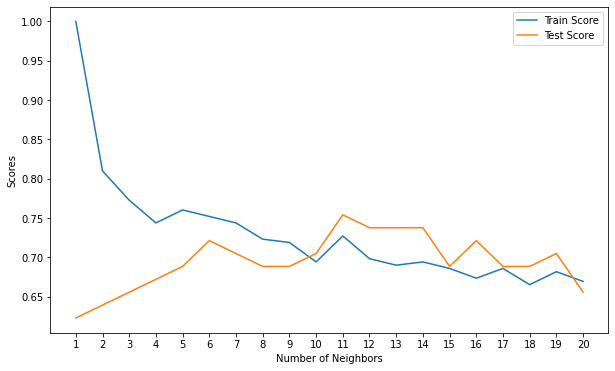

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores')
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f'Maximum KNN score on the Test data: {max(test_scores)*100:.2f}%')
plt.show()

## Hyperparameter Tuning with Randomized SearchCv

### Logistic Regression

In [ ]:
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

In [ ]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

### Random Forest

In [ ]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}


### Tune Logistic Regression model

In [ ]:
np.random.seed(42)

rs_log_reg  = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit the Hyperparameter model with Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Logistic Regression Model Seems Good Out of the Box since we get the same Accuracy with or without Hyperparameter tuning

### Random Forest Model with Hyperparameter and Cross validation

In [ ]:
np.random.seed(42)

rf_for = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit the Hyperparameter model with Logistic Regression

rf_for.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_for.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
rf_for.score(X_test,y_test)

0.8688524590163934

In [ ]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

### GridSearchCV

### Logistic Regression model

In [ ]:
log_reg_grid_s = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}

In [ ]:
np.random.seed(42)

gs_log_reg  = GridSearchCV(LogisticRegression(),
                                 param_grid=log_reg_grid_s,
                                 cv=5,
                                 verbose=True)

# Fit the Hyperparameter model with Logistic Regression

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

Random Forest model

In [ ]:
rf_grid_s = {"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

In [ ]:
# To fit a random Forest grid search hyperparamete model
np.random.seed(42)

rf_grid_s = GridSearchCV(RandomForestClassifier(),
                                 param_grid=rf_grid_s,
                                 cv=5,
                                 verbose=True)

# Fit the Hyperparameter model with Random Forest Classifier

rf_grid_s.fit(X_train,y_train)



'\nnp.random.seed(42)\n\nrf_grid_s = GridSearchCV(RandomForestClassifier(),\n                                 param_grid=rf_grid_s,\n                                 cv=5,\n                                 verbose=True)\n\n# Fit the Hyperparameter model with Random Forest Classifier\n\nrf_grid_s.fit(X_train,y_train)\n\n'

## Evaluating Tuned Machine Learning Classifier beyond Accuracy



1.   ROC curve and AUC Metric
2.   Confusion matrix
3.   Classification report
4.   Precision
5.   Recall
6.   F1-score



Making Prediction using trained Model

In [ ]:
y_pred = gs_log_reg.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## ROC Curve and AUC Metric

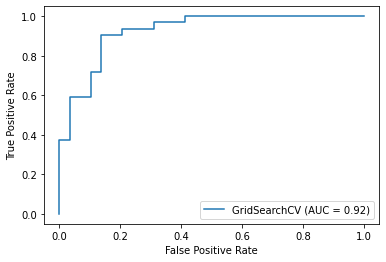

In [ ]:
# Roc Curve
plot_roc_curve(gs_log_reg,X_test,y_test)

## Confusion Matrix

In [ ]:
# Confusion Matrix

print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


In [ ]:
import seaborn as sns

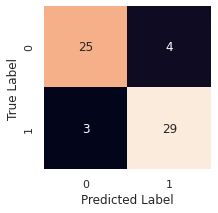

In [ ]:
sns.set(font_scale=1)

def plot_conf_mat(y_test,y_pred):
  fig , ax=plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

plot_conf_mat(y_test, y_pred)

## Classification report

In [ ]:
# Without Cross-Validation 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# With Cross-Validation 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [ ]:
# Cross - Validated Accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,scoring='accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
np.mean(cv_acc)

0.8446994535519124

In [ ]:
cv_acc = np.mean(cv_acc)

In [ ]:
# Cross - Validated Precision

cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [ ]:
np.mean(cv_pre)

0.8207936507936507

In [ ]:
cv_pre = np.mean(cv_pre)

In [ ]:
# Cross - Validated Recall

cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [ ]:
np.mean(cv_rec)

0.9212121212121213

In [ ]:
cv_rec = np.mean(cv_rec)

In [ ]:
# Cross - Validated F1 - Score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [ ]:
np.mean(cv_f1)

0.8673007976269721

In [ ]:
cv_f1 = np.mean(cv_f1)

## Visualize our Cross-Validated Metrics

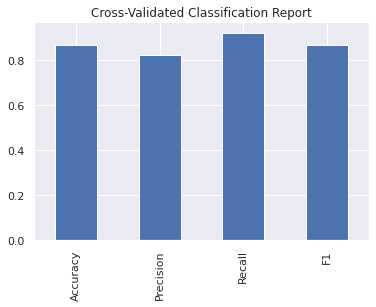

In [ ]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_pre,
                           'Recall': cv_rec,
                           'F1':cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Report',legend=False)

# Feature Importance

Feature Importance is asking which feature Contributed the most to my model,and how did they Contribute

Finding Feature Importance is Different for each Machine Learning model. One way to find Feature Importance is to search (Model_name) feature Importance 

In [ ]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# Match Features to Columns

feature_dict = dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

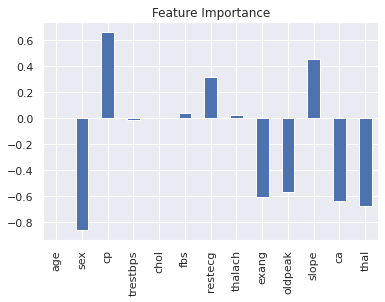

In [ ]:
feature_data = pd.DataFrame(feature_dict,index=[0])
feature_data.T.plot.bar(title='Feature Importance',legend=False)

In [ ]:
pip install catboost

     |████████████████████████████████| 67.4 MB 25 kB/s 


In [ ]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()

In [ ]:
cat_rs = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": np.arange(3, 10)}

In [ ]:
np.random.seed(42)
rscv = RandomizedSearchCV(CatBoostClassifier(),
                          param_distributions=cat_rs,
                          scoring='accuracy', cv =5,
                          verbose=True)
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.5765317	total: 51.8ms	remaining: 51.7s
1:	learn: 0.4931327	total: 58.6ms	remaining: 29.2s
2:	learn: 0.4382184	total: 64.7ms	remaining: 21.5s
3:	learn: 0.3824536	total: 67.9ms	remaining: 16.9s
4:	learn: 0.3350281	total: 74.2ms	remaining: 14.8s
5:	learn: 0.3211759	total: 75.9ms	remaining: 12.6s
6:	learn: 0.2993225	total: 79.2ms	remaining: 11.2s
7:	learn: 0.2783141	total: 83.6ms	remaining: 10.4s
8:	learn: 0.2616994	total: 88ms	remaining: 9.69s
9:	learn: 0.2422483	total: 93.4ms	remaining: 9.24s
10:	learn: 0.2210373	total: 99.8ms	remaining: 8.98s
11:	learn: 0.2056185	total: 105ms	remaining: 8.66s
12:	learn: 0.1955890	total: 109ms	remaining: 8.31s
13:	learn: 0.1825253	total: 115ms	remaining: 8.08s
14:	learn: 0.1695520	total: 120ms	remaining: 7.89s
15:	learn: 0.1589963	total: 126ms	remaining: 7.73s
16:	learn: 0.1522161	total: 134ms	remaining: 7.74s
17:	learn: 0.1415985	total: 137ms	remaining: 7.49s
18:	learn: 0.1329492	t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Streaming output truncated to the last 5000 lines.
27:	learn: 0.1829064	total: 25.2ms	remaining: 873ms
28:	learn: 0.1757458	total: 26.1ms	remaining: 872ms
29:	learn: 0.1705572	total: 27ms	remaining: 872ms
30:	learn: 0.1658572	total: 27.9ms	remaining: 871ms
31:	learn: 0.1621759	total: 28.7ms	remaining: 870ms
32:	learn: 0.1579202	total: 29.6ms	remaining: 868ms
33:	learn: 0.1515239	total: 30.5ms	remaining: 867ms
34:	learn: 0.1475504	total: 31.4ms	remaining: 866ms
35:	learn: 0.1457435	total: 32.3ms	remaining: 864ms
36:	learn: 0.1415888	total: 33.2ms	remaining: 863ms
37:	learn: 0.1383521	total: 34ms	remaining: 862ms
38:	learn: 0.1357482	total: 34.9ms	remaining: 860ms
39:	learn: 0.1300133	total: 35.8ms	remaining: 860ms
40:	learn: 0.1271056	total: 36.8ms	remaining: 860ms
41:	learn: 0.1250962	total: 37.7ms	remaining: 859ms
42:	learn: 0.1220805	total: 38.5ms	remaining: 858ms
43:	learn: 0.1199688	total: 39.5ms	remaining: 857ms
44:	learn: 0.1180069	total: 40.4ms	remaining: 857ms
45:	learn: 0.1169

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


27:	learn: 0.2711749	total: 23.8ms	remaining: 828ms
28:	learn: 0.2665249	total: 24.6ms	remaining: 825ms
29:	learn: 0.2631198	total: 25.4ms	remaining: 822ms
30:	learn: 0.2572530	total: 26.1ms	remaining: 817ms
31:	learn: 0.2545815	total: 26.9ms	remaining: 812ms
32:	learn: 0.2513654	total: 27.6ms	remaining: 809ms
33:	learn: 0.2465318	total: 28.4ms	remaining: 806ms
34:	learn: 0.2458432	total: 29.1ms	remaining: 802ms
35:	learn: 0.2425551	total: 31.7ms	remaining: 848ms
36:	learn: 0.2405085	total: 32.3ms	remaining: 841ms
37:	learn: 0.2392427	total: 33.1ms	remaining: 837ms
38:	learn: 0.2360403	total: 33.8ms	remaining: 833ms
39:	learn: 0.2337784	total: 34.5ms	remaining: 827ms
40:	learn: 0.2307773	total: 35.1ms	remaining: 822ms
41:	learn: 0.2289402	total: 35.9ms	remaining: 818ms
42:	learn: 0.2274156	total: 36.6ms	remaining: 814ms
43:	learn: 0.2255995	total: 37.4ms	remaining: 812ms
44:	learn: 0.2235890	total: 38.1ms	remaining: 808ms
45:	learn: 0.2183767	total: 38.7ms	remaining: 803ms
46:	learn: 0

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f5e2827b450>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=True)

In [ ]:
rscv.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [ ]:
rscv.score(X_test,y_test)

0.8360655737704918